## Practicum 2 
## Predict of Diabetes hospital readmissions

###### Team:
###### Satwick Bodduna (11810077)
###### V .Venkata Sai Kushwanth Reddy (11810002)

###### Data Modeling

###### Importing Requried Libraries for ML Modeling

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [3]:
diabetic_data_model= pd.read_csv("final_Modelused.csv")

##### Splitting the data into training and vallidation data sets. The training data will contain 80 % of the data and validation will contain remaining 20%

In [5]:
X = diabetic_data_model.drop(['readmitted'], axis = 1)
Y = diabetic_data_model['readmitted']

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size = .2, 
                                                random_state = 7, stratify = Y)

In [7]:
#Checking the shape of the Data
print("shape of Xtrain,Xtest:",Xtrain.shape,Xtest.shape)

shape of Xtrain,Xtest: (54532, 39) (13634, 39)


# Logistic Regression

In [8]:
# create model logistic as logistic regression using Sklearn 
logisticreg = LogisticRegression(tol=1e-7, penalty='l2', C=0.0005)
logisticreg.fit(Xtrain, Ytrain)
Ylog = logisticreg.predict(Xtest)

C:\Users\satwi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [9]:
# Checking the accuracy of the model 
print(" The accuracy of the Logistic regression model:" ,logisticreg.score(Xtest, Ytest))

 The accuracy of the Logistic regression model: 0.9096376705295585


In [10]:
YScre = logisticreg.decision_function(Xtest)

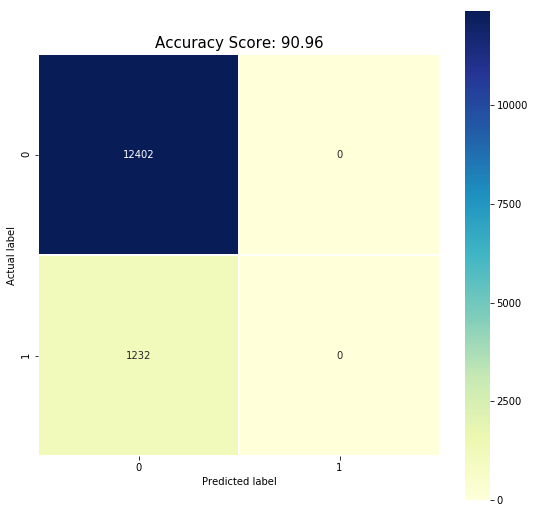

In [12]:
#Checking the confusion matrix
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix(Ytest, Ylog), annot=True, fmt="d", linewidths=.5, square = True, cmap = 'YlGnBu');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(round(logisticreg.score(Xtest, Ytest)*100,2))
plt.title(all_sample_title, size = 15);

In [50]:
# Checking the summary of classification
print(classification_report(Ytest, Ylog))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     12402
           1       0.00      0.00      0.00      1232

   micro avg       0.91      0.91      0.91     13634
   macro avg       0.45      0.50      0.48     13634
weighted avg       0.83      0.91      0.87     13634



C:\Users\satwi\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\satwi\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\satwi\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


##### This translates to a no proportion of readmitted people predicted may be this is due to data inbalance

#### Checking the Lables

In [4]:
diabetic_data_model.groupby('readmitted').size()

readmitted
0    62007
1     6159
dtype: int64

##### Data was highly imbalanced with respect to readmissions (only 10% records for 30-day readmissions), leading to high accuracy. Moreover, the high accuracy could be attributed not to the generalizability of our model to diverse patient records but to the baseline accuracy of 90%: predicting that no patient would be readmitted. 

##### Using SMOTE For balancing the data and spliting the data into 80 and 20 ratio

In [14]:
print('Original dataset shape {}'.format(Counter(Y)))
sm = SMOTE(random_state=20)
diabetes_input_new, diabetes_output_new = sm.fit_sample(X, Y)
print('New dataset shape {}'.format(Counter(diabetes_output_new)))
diabetes_input_new = pd.DataFrame(diabetes_input_new, columns = list(X.columns))
X_train, X_dev, Y_train, Y_dev = train_test_split(diabetes_input_new, diabetes_output_new, test_size=0.20, random_state=0)

Original dataset shape Counter({0: 62007, 1: 6159})
New dataset shape Counter({0: 62007, 1: 62007})


#### Logistic Regression After SMOTE

In [54]:
# create model logistic as logistic regression using Sklearn 
from sklearn.linear_model import LogisticRegression
logisticreg = LogisticRegression(tol=1e-7, penalty='l2', C=0.0005,solver='lbfgs',random_state=0,max_iter =300)
logisticreg.fit(X_train, Y_train)
Ylog_SMOTE = logisticreg.predict(X_dev)
print(" The accuracy of the Logistic regression model:" ,round(logisticreg.score(X_train, Y_train)*100,2))

 The accuracy of the Logistic regression model: 59.09


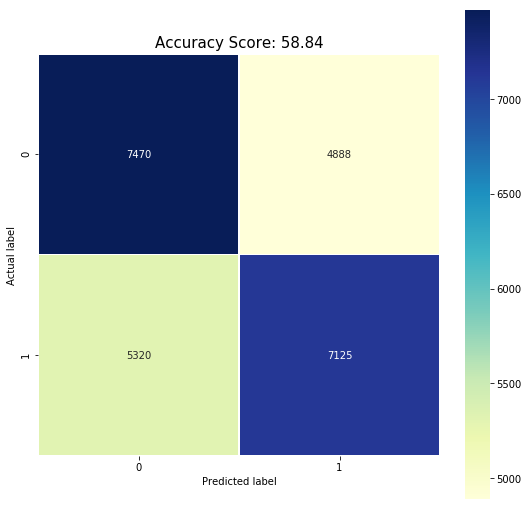

In [55]:
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix(Y_dev, Ylog_SMOTE), annot=True, fmt="d", linewidths=.5, square = True, cmap = 'YlGnBu');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(round(logisticreg.score(X_dev, Y_dev)*100,2))
plt.title(all_sample_title, size = 15);

In [22]:
YScre_aftersmote = logisticreg.decision_function(X_dev)

In [56]:
# Checking the summary of classification
print(classification_report(Y_dev, Ylog_SMOTE))

              precision    recall  f1-score   support

           0       0.58      0.60      0.59     12358
           1       0.59      0.57      0.58     12445

   micro avg       0.59      0.59      0.59     24803
   macro avg       0.59      0.59      0.59     24803
weighted avg       0.59      0.59      0.59     24803



# Random Forest Classifier

In [25]:
random_forest = RandomForestClassifier(random_state=30,n_estimators=300)
random_forest.fit(X_train, Y_train)
randforest = random_forest.predict(X_dev)

In [26]:
#Checking the accuracy
print(" Accuracy of Randomeforest: ", random_forest.score(X_dev, Y_dev))

 Accuracy of Randomeforest:  0.9505301778010724


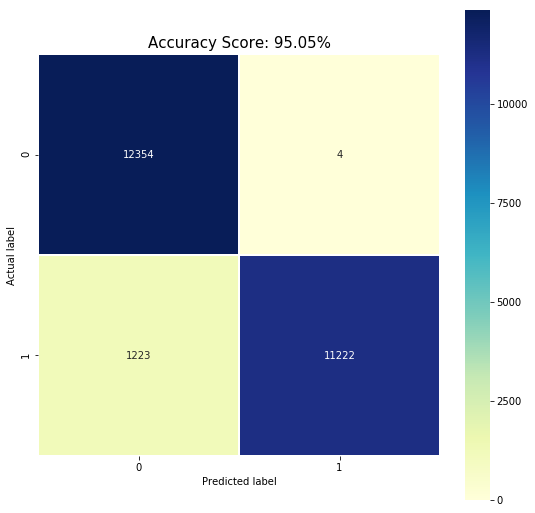

In [27]:
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix(Y_dev, randforest), annot=True, fmt="d", linewidths=.5, square = True, cmap = 'YlGnBu');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(round(random_forest.score(X_dev, Y_dev)*100,2))+str('%')
plt.title(all_sample_title, size = 15);

In [28]:
print(classification_report(Y_dev, randforest))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     12358
           1       1.00      0.90      0.95     12445

   micro avg       0.95      0.95      0.95     24803
   macro avg       0.95      0.95      0.95     24803
weighted avg       0.95      0.95      0.95     24803



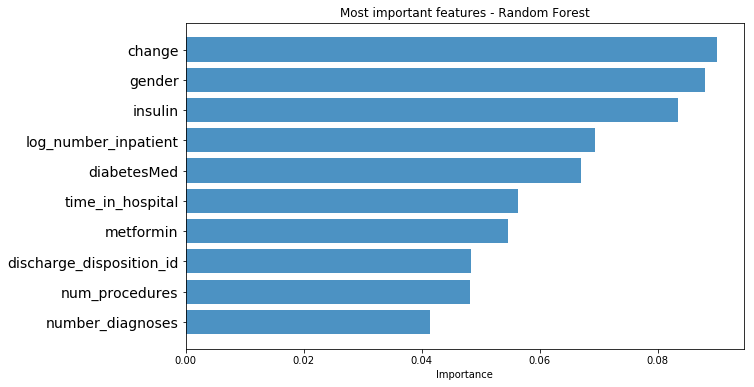

In [29]:
#Determining which features are most important from random forest 
feature_names = X_train.columns
feature_imports = random_forest.feature_importances_
most_imp_features = pd.DataFrame([f for f in zip(feature_names,feature_imports)], columns=["Feature", "Importance"]).nlargest(10, "Importance")
most_imp_features.sort_values(by="Importance", inplace=True)
plt.figure(figsize=(10,6))
plt.barh(range(len(most_imp_features)), most_imp_features.Importance, align='center', alpha=0.8)
plt.yticks(range(len(most_imp_features)), most_imp_features.Feature, fontsize=14)
plt.xlabel('Importance')
plt.title('Most important features - Random Forest')
plt.show()

# AdaBoosted Classification model

In [30]:
#Creating a AdaBoosted Classification model,
adaClassification = AdaBoostClassifier(n_estimators = 20, learning_rate = 0.2, random_state = 123)
adaClassification.fit(X_train, Y_train)
adaClassificationPred = adaClassification.predict(X_dev)

In [32]:
print("The accurary of AdaBoosted Classification model: ", adaClassification.score(X_dev, Y_dev))

The accurary of AdaBoosted Classification model:  0.8360278998508245


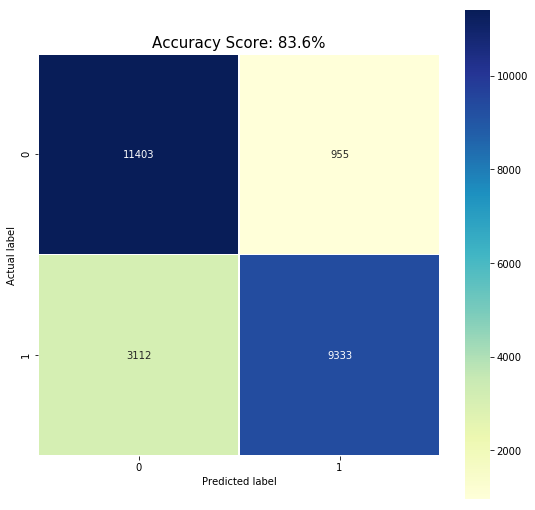

In [33]:
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix(Y_dev, adaClassificationPred), annot=True, fmt="d", linewidths=.5, square = True, cmap = 'YlGnBu');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(round(adaClassification.score(X_dev, Y_dev)*100,2))+str('%')
plt.title(all_sample_title, size = 15);

In [57]:
#Checking the precision and recall of ada boost ClassificationPred
print(classification_report(Y_dev, adaClassificationPred))

              precision    recall  f1-score   support

           0       0.79      0.92      0.85     12358
           1       0.91      0.75      0.82     12445

   micro avg       0.84      0.84      0.84     24803
   macro avg       0.85      0.84      0.83     24803
weighted avg       0.85      0.84      0.83     24803



In [35]:
# calculate the FP and TP from the roc_curve metric
from sklearn.metrics import roc_curve
yadaclas = adaClassification.decision_function(X_dev)
fpr_adaclass, tpr_adaclass, thresholds = roc_curve(Y_dev, adaClassificationPred)

# Hyperparameters Tunning for AdaBoosted

In [36]:
#Trying to tune the model 
ada_boost = AdaBoostClassifier(n_estimators = 10, learning_rate = 0.2, random_state = 30)
boostprameters ={
        'n_estimators': [100, 200,500],
        'learning_rate': [0.2,0.5,1.0],
},
adaboost = GridSearchCV(ada_boost, cv=2, n_jobs=2, param_grid=boostprameters)

In [37]:
%%time
adaboost.fit(X_train,Y_train)

Wall time: 10min 57s


GridSearchCV(cv=2, error_score='raise-deprecating',
       estimator=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.2, n_estimators=10, random_state=30),
       fit_params=None, iid='warn', n_jobs=2,
       param_grid=({'n_estimators': [100, 200, 500], 'learning_rate': [0.2, 0.5, 1.0]},),
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [38]:
adapred = adaboost.predict(X_dev)
adaboost.score(X_dev, Y_dev)

0.9464984074507116

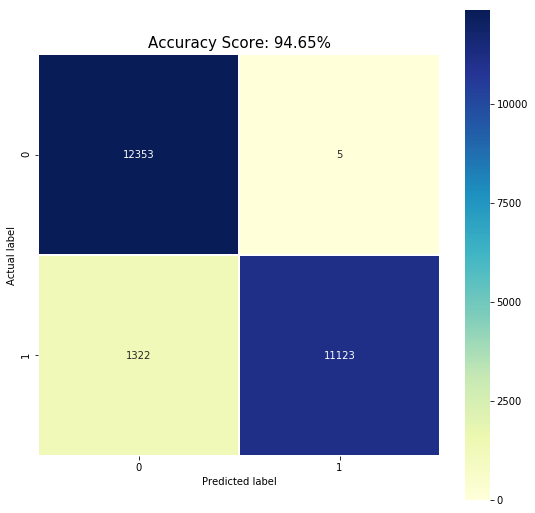

In [39]:
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix(Y_dev, adapred), annot=True, fmt="d", linewidths=.5, square = True, cmap = 'YlGnBu');
all_sample_title = 'Accuracy Score: {0}'.format(round(adaboost.score(X_dev, Y_dev)*100,2))+str('%')
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title(all_sample_title, size = 15);

In [58]:
adaboostpred = adaboost.predict(X_dev)
print(classification_report(Y_dev, adaboostpred))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95     12358
           1       1.00      0.89      0.94     12445

   micro avg       0.95      0.95      0.95     24803
   macro avg       0.95      0.95      0.95     24803
weighted avg       0.95      0.95      0.95     24803



In [41]:
ygridadascore = adaboost.decision_function(X_dev)

# Decision Tree

In [42]:
DecisionTree =  DecisionTreeClassifier(max_depth=28, criterion = "entropy", min_samples_split=10)
print("Cross Validation score: {:.2%}".format(np.mean(cross_val_score(DecisionTree, X_train, Y_train, cv=10))))
DecisionTree.fit(X_train, Y_train)
print("Dev Set score: {:.2%}".format(DecisionTree.score(X_dev, Y_dev)))

Cross Validation score: 90.80%
Dev Set score: 91.04%


In [43]:
ypreddt = DecisionTree.predict(X_dev)
print( "Accuracy is ", accuracy_score(Y_dev,ypreddt)*100)

Accuracy is  91.04140628149821


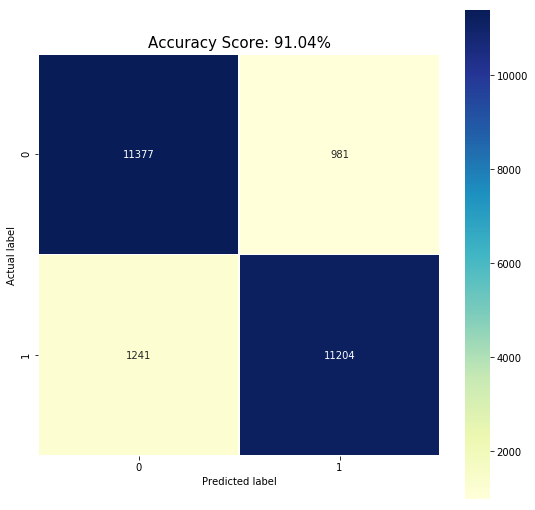

In [44]:
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix(Y_dev, ypreddt), annot=True, fmt="d", linewidths=.5, square = True, cmap = 'YlGnBu');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(round(accuracy_score(Y_dev,ypreddt)*100,2))+str('%')
plt.title(all_sample_title, size = 15);

In [45]:
print(classification_report(Y_dev, ypreddt))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91     12358
           1       0.92      0.90      0.91     12445

   micro avg       0.91      0.91      0.91     24803
   macro avg       0.91      0.91      0.91     24803
weighted avg       0.91      0.91      0.91     24803



# Comparing the models

#### Comparing the models using roc curve

In [46]:
#Saving the probabilites
fpr_log_beforesmote, tpr_log_beforesmote, thresholds = roc_curve(Ytest, YScre)#logistic regression
fpr_log, tpr_log, thresholds = roc_curve(Y_dev, YScre_aftersmote)#logistic after smote regression
fpr_rf, tpr_rf, thresholds = roc_curve(Y_dev, randforest)#random forest classifier
fpr_adaclf, tpr_adaclf, thresholds = roc_curve(Y_dev, yadaclas)#Ada boost classifier
fpr_adamod, tpr_adamod, thresholds = roc_curve(Y_dev,ygridadascore )#Hyperparameters Tunning for AdaBoosted
fpr_dt, tpr_dt, thresholds = roc_curve(Y_dev,ypreddt )

C:\Users\satwi\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


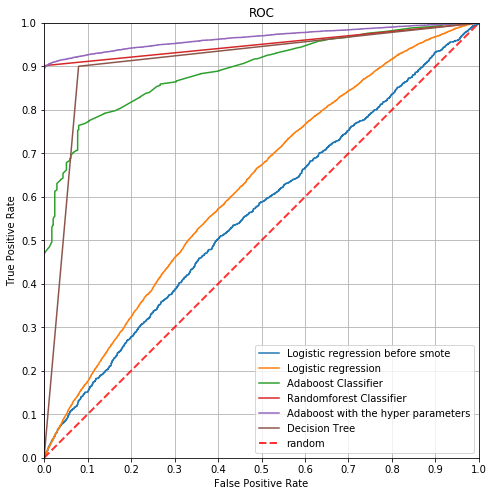

In [61]:
plt.figure(figsize=(8,8))
plt.plot(fpr_log_beforesmote, tpr_log_beforesmote, label='Logistic regression before smote')
plt.plot(fpr_log, tpr_log, label='Logistic regression')
plt.plot(fpr_adaclf, tpr_adaclf, label='Adaboost Classifier')
plt.plot(fpr_rf, tpr_rf, label='Randomforest Classifier')
plt.plot(fpr_adamod, tpr_adamod, label='Adaboost with the hyper parameters')
plt.plot(fpr_dt, tpr_dt, label='Decision Tree')
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',label='random', alpha=.8)
plt.xlim([0,1])
plt.ylim([0,1])
plt.xticks(np.arange(0,1.1,0.1))
plt.yticks(np.arange(0,1.1,0.1))
plt.grid()
plt.legend()
plt.axes().set_aspect('equal')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

##### Our objective is to predict readmission with in 30 days (TRUE POSITIVE),
##### Adaclassifier with hyperparameters & randomforest give us good sensitivity (POSITIVE)

#### Comparing Model Accuracy

In [48]:
print("Accuracy of Logistic regression model before smote:" ,round((logisticreg.score(Xtest, Ytest)*100),2))
print('-------After SMOTE-----')
print("Accuracy of Logistic regression model:" ,round((logisticreg.score(X_dev, Y_dev)*100),2))
print("Accuracy of Random forest classification: ", round((random_forest.score(X_dev, Y_dev)*100),2))
print("Accuracy of AdaBoosted Classification model: ", round((adaClassification.score(X_dev, Y_dev)*100),2))
print("Accuracy of Hyperparameter Tuning AdaBoosted Classification model: ", round((adaboost.score(X_dev, Y_dev)*100),2))
print( "Accuracy of Decision Tree ", round((accuracy_score(Y_dev,ypreddt)*100),2))

Accuracy of Logistic regression model before smote: 59.18
-------After SMOTE-----
Accuracy of Logistic regression model: 58.55
Accuracy of Random forest classification:  95.05
Accuracy of AdaBoosted Classification model:  83.6
Accuracy of Hyperparameter Tuning AdaBoosted Classification model:  94.65
Accuracy of Decision Tree  91.04
